In [6]:
import numpy as np
import matplotlib.pyplot as matplot
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import rand_score
from utils import *

In [16]:
# importing the dataset
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
    
# deleting the columns with unique values and rescaling
# X = X[:, ~np.all(X[1:] == X[:-1], axis=0)]
X = X/255
scaler = StandardScaler()
X = scaler.fit_transform(X)

# check if mean = 0 and std = 1
print((X.mean(axis = 0)).mean())
print((X.std(axis = 0)).mean())

8.644688463608271e-19
0.9170918367346939


In [17]:
# splitting the data into train, validation and test
X_old, X_new, y_old, y_new = train_test_split(X, y, test_size = 0.6, random_state = 0)
X_train_80, X_test, y_train_80, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)
X_train, X_valid , y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size = 0.25, random_state = 0)

In [18]:
five_train_time = []
five_test_time = []
five_rand = []

seven_train_time = []
seven_test_time = []
seven_rand = []

ten_train_time = []
ten_test_time = []
ten_rand = []

twelve_train_time = []
twelve_test_time = []
twelve_rand = []

fifteen_train_time = []
fifteen_test_time = []
fifteen_rand = []

for n_comp in [2, 10, 50, 100, 150, 200]: 
    pca = PCA(n_components=n_comp)
    X_train_proj = pca.fit_transform(X_train)
    X_valid_proj = pca.fit_transform(X_valid)
    print('Projected train and validation sets : ',X_train_proj.shape, X_valid_proj.shape)
    
    for k in [5, 7, 10, 12, 15]:
        # for init_par in ['kmeans', 'kmeans++', 'random_from_data']:
            gm = GaussianMixture(n_components=k, covariance_type = 'diag')

            start_train = time.time()
            gm.fit(X_train_proj)
            time_train = time.time() - start_train

            start_test = time.time()
            labels = gm.predict(X_valid_proj)
            time_test = time.time() - start_test

            rand = rand_score(y_valid, labels)

            print(f'PCA dimension : {n_comp} --- n_clusters : {k} --- rand index : {rand} --- n_iter : {gm.n_iter_} --- converged : {gm.converged_}')
            print('Train time : ', time_train)
            print('Test_time : ', time_test)
            print('\n')

            if k == 5:
                five_train_time.append(time_train)
                five_test_time.append(time_test)
                five_rand.append(rand)
            else:
                if k == 7:
                    seven_train_time.append(time_train)
                    seven_test_time.append(time_test)
                    seven_rand.append(rand)
                else:
                    if k == 10:
                        ten_train_time.append(time_train)
                        ten_test_time.append(time_test)
                        ten_rand.append(rand)
                    else:
                        if k == 12:
                            twelve_train_time.append(time_train)
                            twelve_test_time.append(time_test)
                            twelve_rand.append(rand)
                        else:
                            fifteen_train_time.append(time_train)
                            fifteen_test_time.append(time_test)
                            fifteen_rand.append(rand)

Projected train and validation sets :  (25200, 2) (8400, 2)
PCA dimension : 2 --- n_clusters : 5 --- rand index : 0.761001111243402 --- n_iter : 44 --- converged : True
Train time :  0.31362104415893555
Test_time :  0.002919912338256836


PCA dimension : 2 --- n_clusters : 7 --- rand index : 0.7929882809177964 --- n_iter : 30 --- converged : True
Train time :  0.26216888427734375
Test_time :  0.0011200904846191406


PCA dimension : 2 --- n_clusters : 10 --- rand index : 0.8260593097817768 --- n_iter : 21 --- converged : True
Train time :  0.22434473037719727
Test_time :  0.0010571479797363281


PCA dimension : 2 --- n_clusters : 12 --- rand index : 0.8347226143701915 --- n_iter : 11 --- converged : True
Train time :  0.1753861904144287
Test_time :  0.001130819320678711


PCA dimension : 2 --- n_clusters : 15 --- rand index : 0.8485414930348851 --- n_iter : 10 --- converged : True
Train time :  0.18198108673095703
Test_time :  0.0014867782592773438


Projected train and validation sets 

/Users/nicolaaggio/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


PCA dimension : 150 --- n_clusters : 12 --- rand index : 0.6157899749970235 --- n_iter : 100 --- converged : False
Train time :  3.3800251483917236
Test_time :  0.0035011768341064453


PCA dimension : 150 --- n_clusters : 15 --- rand index : 0.6666861701222935 --- n_iter : 75 --- converged : True
Train time :  2.7375941276550293
Test_time :  0.004144906997680664


Projected train and validation sets :  (25200, 200) (8400, 200)
PCA dimension : 200 --- n_clusters : 5 --- rand index : 0.5991491050521888 --- n_iter : 31 --- converged : True
Train time :  1.0132548809051514
Test_time :  0.0044422149658203125


PCA dimension : 200 --- n_clusters : 7 --- rand index : 0.6751475232312236 --- n_iter : 35 --- converged : True
Train time :  1.1524450778961182
Test_time :  0.00393223762512207


PCA dimension : 200 --- n_clusters : 10 --- rand index : 0.6675135645399962 --- n_iter : 42 --- converged : True
Train time :  1.7148211002349854
Test_time :  0.0058193206787109375


PCA dimension : 200 --- 

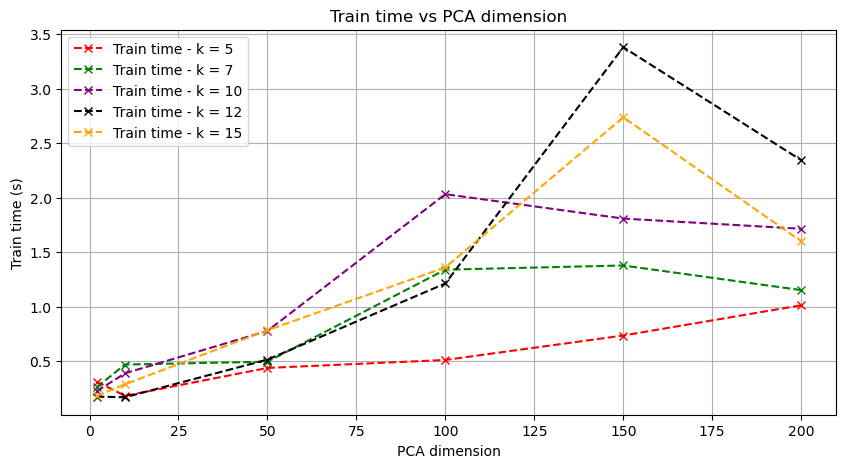

In [19]:
n_comp = [2, 10, 50, 100, 150, 200]

matplot.subplots(figsize=(10, 5))
matplot.plot(n_comp, five_train_time,'--x' ,color='red' , label="Train time - k = 5")
matplot.plot(n_comp, seven_train_time,'--x', color = 'green' ,label="Train time - k = 7")
matplot.plot(n_comp, ten_train_time,'--x' ,color = 'purple', label="Train time - k = 10")
matplot.plot(n_comp, twelve_train_time,'--x' , color = 'black', label="Train time - k = 12")
matplot.plot(n_comp, fifteen_train_time,'--x' , color = 'orange', label="Train time - k = 15")
matplot.grid(True)
matplot.xlabel("PCA dimension")
matplot.ylabel("Train time (s)")
matplot.legend()
matplot.title('Train time vs PCA dimension')
matplot.show()

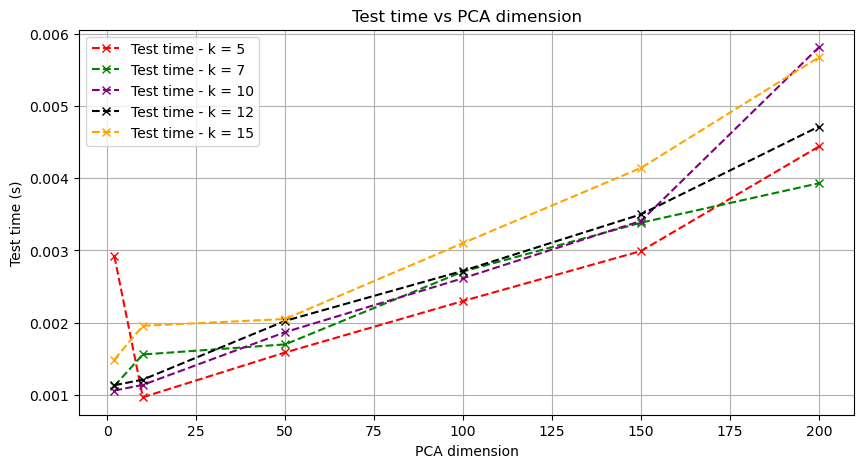

In [20]:
n_comp = [2, 10, 50, 100, 150, 200]

matplot.subplots(figsize=(10, 5))
matplot.plot(n_comp, five_test_time,'--x' ,color='red' , label="Test time - k = 5")
matplot.plot(n_comp, seven_test_time,'--x' , color = 'green', label="Test time - k = 7")
matplot.plot(n_comp, ten_test_time,'--x' , color = 'purple', label="Test time - k = 10")
matplot.plot(n_comp, twelve_test_time,'--x' , color = 'black', label="Test time - k = 12")
matplot.plot(n_comp, fifteen_test_time,'--x' , color = 'orange', label="Test time - k = 15")
matplot.grid(True)
matplot.xlabel("PCA dimension")
matplot.ylabel("Test time (s)")
matplot.legend()
matplot.title('Test time vs PCA dimension')
matplot.show()

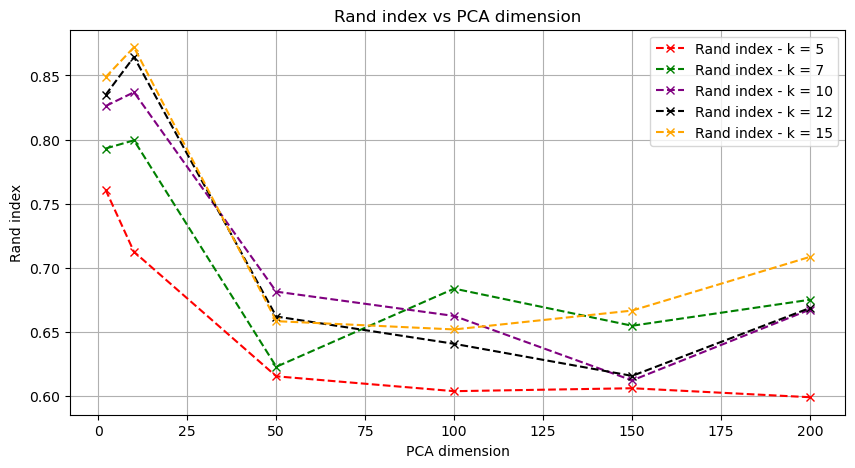

In [21]:
n_comp = [2, 10, 50, 100, 150, 200]

matplot.subplots(figsize=(10, 5))
matplot.plot(n_comp, five_rand,'--x' ,color='red' , label="Rand index - k = 5")
matplot.plot(n_comp, seven_rand,'--x' , color = 'green', label="Rand index - k = 7")
matplot.plot(n_comp, ten_rand,'--x' , color = 'purple', label="Rand index - k = 10")
matplot.plot(n_comp, twelve_rand,'--x' , color = 'black', label="Rand index - k = 12")
matplot.plot(n_comp, fifteen_rand,'--x' , color = 'orange', label="Rand index - k = 15")
matplot.grid(True)
matplot.xlabel("PCA dimension")
matplot.ylabel("Rand index")
matplot.legend()
matplot.title('Rand index vs PCA dimension')
matplot.show()

Executing the best model, i.e. n_comp = 10 and k = 15.

In [22]:
pca = PCA(n_components=10)
X_train_proj = pca.fit_transform(X_train)
X_test_proj = pca.fit_transform(X_test)

gm = GaussianMixture(n_components=15, covariance_type = 'diag')

start_train = time.time()
gm.fit(X_train_proj)
time_train = time.time() - start_train

start_test = time.time()
labels = gm.predict(X_test_proj)
time_test = time.time() - start_test

rand = rand_score(y_test, labels)

print(f'n_clusters : 15 --- rand index : {rand} --- n_iter : {gm.n_iter_} --- converged : {gm.converged_}')
print('Train time : ', time_train)
print('Test_time : ', time_test)

n_clusters : 15 --- rand index : 0.8349795610588562 --- n_iter : 15 --- converged : True
Train time :  0.25201416015625
Test_time :  0.0014269351959228516


Visualization of the clustering results for n_comp = 2 and k = 15 (the best rand index obtained).

In [23]:
pca = PCA(n_components=2)
X_train_proj = pca.fit_transform(X_train)
X_test_proj = pca.fit_transform(X_test)

gm = GaussianMixture(n_components=15, covariance_type = 'diag')

start_train = time.time()
gm.fit(X_train_proj)
time_train = time.time() - start_train

start_test = time.time()
labels = gm.predict(X_test_proj)
time_test = time.time() - start_test

rand = rand_score(y_test, labels)

print(f'n_clusters : 15 --- rand index : {rand} --- n_iter : {gm.n_iter_} --- converged : {gm.converged_}')
print('Train time : ', time_train)
print('Test_time : ', time_test)

n_clusters : 15 --- rand index : 0.8540911049501357 --- n_iter : 11 --- converged : True
Train time :  0.1838059425354004
Test_time :  0.0012841224670410156


In [15]:
plot_clustering(X_test_proj, labels, None)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 2000x1000 with 0 Axes>

In [ ]:
#matplot.figure(1)
#matplot.clf()

# da vedere risultato della cella precedente
#colors = ["#dede00", "#377eb8", "#f781bf", 'black', 'red',
         #'sandybrown', 'gold', 'darkgreen', 'darkcyan', 'navy',
         #'blue', 'darkorchid', 'palevioletred', 'orange', 'lime']
# markers = ["x", "o", "^"]

#for k, col in zip(range(15), colors):
    #my_members = labels == k
    # cluster_center = cluster_centers[k]
    #plt.plot(X_test[my_members, 0], X_test[my_members, 1], #markers[k]
             #color=col)
    # plt.plot(
      #  cluster_center[0],
       # cluster_center[1],
        #markers[k],
        #markerfacecolor=col,
        #markeredgecolor="k",
        #markersize=14,
    #)
#plt.title("Number of clusters: 15")
#plt.show()